# EX1



In [ ]:
import warnings
warnings.filterwarnings('ignore')

## Question One
This exercise is based on data that appeared in the November 9, 1988 edition of the Wall Street
Journal. The example was originally used in Siegel (1997), but was also used in Sheather (2009).

To quote Siegel:
US Treasury bonds are among the least risky investments, in terms of the likelihood of
your receiving the promised payments. In addition to the primary market auctions by
the Treasury, there is an active secondary market in which all outstanding issues can be
traded. You would expect to see an increasing relationship between the coupon of the
bond, which indicates the size of its periodic payment (twice a year), and the current
selling price. The ... data set of coupons and bid prices (are) for US Treasury bonds
maturing between 1994 and 1998 ... The bid prices are listed per "face value" of 100 dollars to
be paid at maturity. Half of the coupon rate is paid every six months. For example, the
first one listed pays $3.50 (half of the 7% coupon rate) every six months until maturity,
at which time it pays an additional 100 dollars.

### Parts (Q1)

The data file (bonds.txt) can be found on Canvas.
Do each of the following. We will treat `BidPrice` as the response and `CouponRate` as the
predictor.

1. Use the seaborn function regplot to create a scatter plot of the bid price versus the coupon rate with the least squares regression line superimposed. Comment on the form.

2. Fit the model using including all of the predictors (i.e., using the entire design matrix you just constructed), via `sm.OLS`. Remember that `BidPrice` is the response. Show the `summary` output.

3. Construct the plot of residuals versus fitted values and comment on its form.
4. Using the standard approach, construct a 95% confidence interval for the slope coefficient (Beta1) based on this initial model. Do you trust this confidence interval?

In [ ]:
import seaborn as sns
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt

In [ ]:
bonds = pd.read_csv('bonds.txt', delim_whitespace=True)

In [ ]:
bonds.head()

,Case,CouponRate,BidPrice
0,1,7.000,92.94
1,2,9.000,101.44
2,3,7.000,92.66
3,4,4.125,94.50
4,5,13.125,118.94


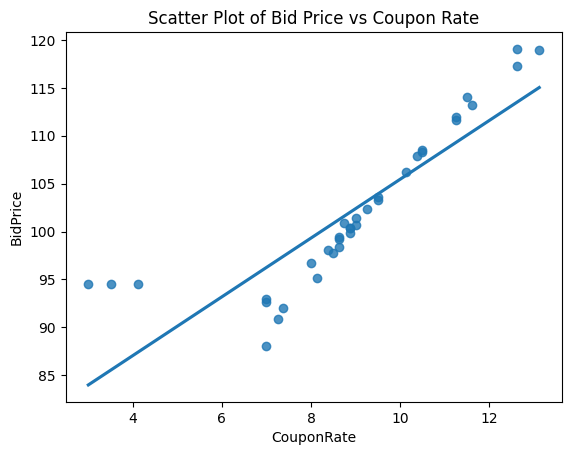

In [ ]:
#scatter plot of bid price vs coupon rate with the least squares regression line superimposed
sns.regplot(data=bonds, x='CouponRate', y='BidPrice', ci=None)
plt.title("Scatter Plot of Bid Price vs Coupon Rate")
plt.show()

The scatter plot reveals a strong positive linear relationship between coupon rate and bid price, with most data points closely following the regression line, indicating a good fit for the linear model. However, minor deviations at lower coupon rates suggest potential market-specific dynamics or slight heteroscedasticity.

In [ ]:
#add constant to the predictor for the intercept
X = sm.add_constant(bonds['CouponRate'])
y = bonds['BidPrice']
model = sm.OLS(y, X).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:               BidPrice   R-squared:                       0.752
Model:                            OLS   Adj. R-squared:                  0.744
Method:                 Least Squares   F-statistic:                     99.87
Date:                Tue, 28 Jan 2025   Prob (F-statistic):           1.64e-11
Time:                        22:37:54   Log-Likelihood:                -98.656
No. Observations:                  35   AIC:                             201.3
Df Residuals:                      33   BIC:                             204.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         74.7866      2.827     26.458      0.0

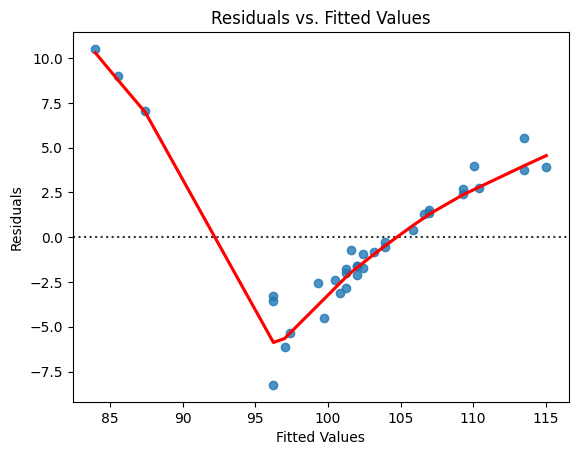

In [ ]:
fitted_values = model.fittedvalues
residuals = model.resid
sns.residplot(x=fitted_values, y=residuals)
sns.regplot(x=fitted_values, y=residuals, lowess=True, scatter=False, color='red')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs. Fitted Values')
plt.show()

The residuals vs. fitted values plot indicates a clear pattern, suggesting the linearity assumption may not hold perfectly. The spread of residuals increases with fitted values, indicating slight heteroscedasticity. In addition, the residuals are not randomly scattered around the horizontal zero line, but appear to form a pattern that indicates a non-inear relationship between coupon rate and bid price (as clearly demonstrated by the red line)

In [ ]:
ci = model.conf_int(alpha=0.05)
beta1_ci = ci.loc['CouponRate']

print(f"95% Confidence Interval for Beta1: {beta1_ci}")

95% Confidence Interval for Beta1: 0    2.441906
1    3.690299
Name: CouponRate, dtype: float64


Although the R-squared (0.752) suggests a moderately strong fit, the residuals plot indicate several key assumptions are violated (non-linearity). Therefore, the statistical significance of beta 1 and the confidence interval may not be reliable.

## Question Two
This exercise is based on the "Benchmark Bond Trade Price Challenge" which
was conducted on the web site Kaggle.com.
You can see the full details of this challenge at
[http://www.kaggle.com/c/benchmark-bond-trade-price-challenge](http://www.kaggle.com/c/benchmark-bond-trade-price-challenge),
but you may have to register (it is free).
This is reproduced from the "Background" section:

<blockquote>
As far as price transparency is concerned, there has historically been a huge gap between the amount of reference information available to those trading equities versus those trading corporate bonds.  Stock exchanges report trades, bids and offers at all times.  Free access is available online with a 15 minute delay while traders who demand more information can pay for ultra efficient real time data and information about size of current bids and offers. By contrast, bond trades are required to be reported within 15 minutes and only those who pay for the TRACE feed can access this information.  No quotes are publicly available and the best way to get a quote is to solicit multiple brokers and wait for a reply.  Alternatively there are data companies that provide end of day prices, published after the market has closed and with no guarantee that the specific information sought will be included.  Accurate bond pricing is also hindered by lack of liquidity.  Only a fraction of TRACE eligible bonds trade on a given day, so the most recent trade price is often multiple days old.  Pricing bonds based on other more liquid bonds that have similar features is common, but again limited by the presence of such bonds.

Benchmark Solutions is the first provider of realtime corporate bond prices. Every 10 seconds we provide accurate prices that incorporate interest rate data, trades or quotes of the bond in question, trades or quotes of other bonds or CDS of the issuer of the bond in question as well as other input sources.  Pricing bonds accurately requires an exacting knowledge of payment schedules, trading calenders and reference data for each bond.  This, as well as synthesizing all of the bonds and CDS quotes and trades of a given issuer into implied hazard and funding curves, is something that we feel is beyond the scope of this challenge.  Rather, we provide you with a reference price which is an intermediate result of our calculations and is labeled 'curve\_based\_price'  in the dataset. Thus the competition focuses on trading dynamics and microstructure of individual bonds, rather than all bonds from a given issuer.
</blockquote>

We created a reduced data set in order to make this challenge
something we could manage during this exercise. This data file (bonddata.txt) is available on CANVAS.

We will fit regression models which attempt to model `trade_price`

## Setup

This initial portion of code reads in the data set.

In [ ]:
import pandas as pd
data = pd.read_csv("bonddata.txt")

These are the first few rows of the data set.

In [ ]:
data.head()

,id,bond_id,trade_price,weight,current_coupon,time_to_maturity,is_callable,reporting_delay,trade_size,trade_type,...,received_time_diff_last9,trade_price_last9,trade_size_last9,trade_type_last9,curve_based_price_last9,received_time_diff_last10,trade_price_last10,trade_size_last10,trade_type_last10,curve_based_price_last10
0,10,1,126.268,7.616851,5.950,25.940349,0,12.540,150000.0,3,...,2862729,128.596,120000.0,2,127.561201,3621492,129.089,200000.0,2,129.435587
1,38,2,101.009,0.018373,3.550,0.326392,0,9.327,450000.0,3,...,532644,101.086,500000.0,2,101.103180,538510,101.070,25000.0,2,101.102243
2,336,3,108.144,3.537380,4.200,2.340601,0,0.102,160000.0,4,...,96293,107.917,400000.0,2,107.874965,96293,107.917,400000.0,4,107.874965
3,781,4,116.953,0.402523,4.875,7.367653,0,52.093,10000.0,4,...,92559,115.924,10000.0,2,116.160420,97177,116.458,2000.0,3,116.342802
4,1172,14,133.210,0.210685,10.750,4.159301,0,13.722,25000.0,4,...,6400208,127.500,25000.0,2,131.066998,6400208,127.500,25000.0,4,131.066998


The size of the data set.

In [ ]:
data.shape

(1620, 61)

These next commands remove some variables which are not useful predictors, and define some variables to be categorical.

In [ ]:
data = data.drop(['id', 'bond_id'], axis=1)

In [ ]:
data['is_callable'] = data['is_callable'].astype('category').cat.as_unordered()
data['trade_type'] = data['trade_type'].astype('category').cat.as_unordered()
data['trade_type_last1'] = data['trade_type_last1'].astype('category').cat.as_unordered()
data['trade_type_last2'] = data['trade_type_last2'].astype('category').cat.as_unordered()
data['trade_type_last3'] = data['trade_type_last3'].astype('category').cat.as_unordered()
data['trade_type_last4'] = data['trade_type_last4'].astype('category').cat.as_unordered()
data['trade_type_last5'] = data['trade_type_last5'].astype('category').cat.as_unordered()
data['trade_type_last6'] = data['trade_type_last6'].astype('category').cat.as_unordered()
data['trade_type_last7'] = data['trade_type_last7'].astype('category').cat.as_unordered()
data['trade_type_last8'] = data['trade_type_last8'].astype('category').cat.as_unordered()
data['trade_type_last9'] = data['trade_type_last9'].astype('category').cat.as_unordered()
data['trade_type_last10'] = data['trade_type_last10'].astype('category').cat.as_unordered()

## Transforming Predictors

Some of the non-categorical predictors have distributions which are highly skewed. For example, take a look at the  histogram below.

<Axes: >

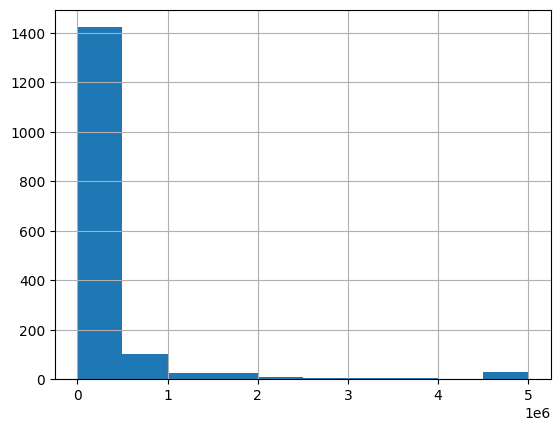

In [ ]:
data['trade_size_last1'].hist()

For predictors with such a distribution, it can be a very good idea to transform them prior to fitting the model. For strictly positive variables, a log transform is common, while for nonnegative variables a square root transform has a similar effect. For this reason, the following transformations are applied.

In [ ]:
import numpy as np
data['time_to_maturity_lt'] = np.log(data['time_to_maturity'])
data['trade_size_lt'] = np.log(data['trade_size'])

data['trade_size_last1_lt'] = np.log(data['trade_size_last1'])
data['trade_size_last2_lt'] = np.log(data['trade_size_last2'])
data['trade_size_last3_lt'] = np.log(data['trade_size_last3'])
data['trade_size_last4_lt'] = np.log(data['trade_size_last4'])
data['trade_size_last5_lt'] = np.log(data['trade_size_last5'])
data['trade_size_last6_lt'] = np.log(data['trade_size_last6'])
data['trade_size_last7_lt'] = np.log(data['trade_size_last7'])
data['trade_size_last8_lt'] = np.log(data['trade_size_last8'])
data['trade_size_last9_lt'] = np.log(data['trade_size_last9'])
data['trade_size_last10_lt'] = np.log(data['trade_size_last10'])

data['received_time_diff_last1_st'] = np.sqrt(data['received_time_diff_last1'])
data['received_time_diff_last2_st'] = np.sqrt(data['received_time_diff_last2'])
data['received_time_diff_last3_st'] = np.sqrt(data['received_time_diff_last3'])
data['received_time_diff_last4_st'] = np.sqrt(data['received_time_diff_last4'])
data['received_time_diff_last5_st'] = np.sqrt(data['received_time_diff_last5'])
data['received_time_diff_last6_st'] = np.sqrt(data['received_time_diff_last6'])
data['received_time_diff_last7_st'] = np.sqrt(data['received_time_diff_last7'])
data['received_time_diff_last8_st'] = np.sqrt(data['received_time_diff_last8'])
data['received_time_diff_last9_st'] = np.sqrt(data['received_time_diff_last9'])
data['received_time_diff_last10_st'] = np.sqrt(data['received_time_diff_last10'])

In [ ]:
datatransformed = data.drop(['received_time_diff_last1','received_time_diff_last2','received_time_diff_last3',
                 'received_time_diff_last4','received_time_diff_last5','received_time_diff_last6',
                 'received_time_diff_last7','received_time_diff_last8','received_time_diff_last9',
                 'received_time_diff_last10','trade_size_last1','trade_size_last2','trade_size_last3',
                 'trade_size_last4','trade_size_last5','trade_size_last6','trade_size_last7',
                 'trade_size_last8','trade_size_last9','trade_size_last10','time_to_maturity',
                'trade_size'], axis=1)

## Constructing the Design Matrix

This next command will appropriate construct the design matrix for this model. The first version `designmatrix` does not contain the column of ones, while the second version `desginmatrix_withones` does include that column of ones.

In [ ]:
designmatrix = pd.get_dummies(datatransformed,drop_first=True)

In [ ]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

designmatrix_withones = sm.add_constant(designmatrix)

In [ ]:
designmatrix_withones

,const,trade_price,weight,current_coupon,reporting_delay,curve_based_price,trade_price_last1,curve_based_price_last1,trade_price_last2,curve_based_price_last2,...,trade_type_last6_3,trade_type_last6_4,trade_type_last7_3,trade_type_last7_4,trade_type_last8_3,trade_type_last8_4,trade_type_last9_3,trade_type_last9_4,trade_type_last10_3,trade_type_last10_4
0,1.0,126.268,7.616851,5.95000,12.540,126.017363,125.101,124.717608,124.7570,124.721953,...,False,False,True,False,False,True,False,False,False,False
1,1.0,101.009,0.018373,3.55000,9.327,101.068546,101.009,101.068546,100.8500,101.066038,...,False,False,False,False,False,False,False,False,False,False
2,1.0,108.144,3.537380,4.20000,0.102,107.927659,107.990,107.922875,107.9900,107.920620,...,False,False,True,False,False,False,False,False,False,True
3,1.0,116.953,0.402523,4.87500,52.093,116.552464,115.842,116.542486,116.1944,116.542486,...,False,True,False,True,False,False,False,False,True,False
4,1.0,133.210,0.210685,10.75000,13.722,130.202417,133.612,130.211787,130.0530,129.634267,...,True,False,False,True,True,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1615,1.0,116.407,0.018373,5.95000,0.638,117.747938,116.407,117.747938,116.9500,117.559535,...,False,False,False,False,True,False,False,True,True,False
1616,1.0,101.750,3.151100,9.25000,16.014,101.400020,101.520,101.225044,101.4800,101.225044,...,False,True,True,False,False,True,False,False,False,False
1617,1.0,92.350,8.477502,0.72625,26.003,94.987898,92.000,95.053641,92.1500,95.053641,...,False,True,True,False,False,False,False,False,False,True
1618,1.0,105.760,3.830211,6.25000,68.501,105.900870,105.419,105.769583,103.5000,103.901969,...,True,False,True,False,False,False,False,True,True,False


### Parts (Q2)

Now, do each of the following:

1. Fit the model using including all of the predictors (i.e., using the entire design matrix you just constructed), via `sm.OLS`. Remember that `trade_price` is the response. Show the `summary` output.

2. Construct the plot of residuals versus fitted values for the model fit in Part 1. Comment on the quality of the fit.

3. Construct the normal probability plot of the residuals. What does this plot tell us?

4. Implement a stepwise variable selection procedure using AIC to find a simpler model. Report on the resulting model.

5. Repeat the above, but use PRESS instead of AIC. How does the resulting model change?

1. Fit the model using including all of the predictors

In [ ]:
# Variables
y = datatransformed['trade_price']
X = designmatrix_withones.drop(columns=['trade_price'])
formula = "trade_price ~ " + "+".join(X.columns)

In [ ]:
# model
model = sm.OLS.from_formula(formula, data = designmatrix_withones)
results = model.fit()

In [ ]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:            trade_price   R-squared:                       0.980
Model:                            OLS   Adj. R-squared:                  0.980
Method:                 Least Squares   F-statistic:                     1128.
Date:                Thu, 30 Jan 2025   Prob (F-statistic):               0.00
Time:                        01:34:12   Log-Likelihood:                -3065.8
No. Observations:                1620   AIC:                             6272.
Df Residuals:                    1550   BIC:                             6649.
Df Model:                          69                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept       

2. Construct the plot of residuals versus fitted values for the model fit in Part 1.

Comment: The residuals vs. fitted values plot shows that most residuals are centered around zero, but there are a few outliers and some signs of increasing variance as the fitted values grow. This could mean the model's assumptions about constant variance might not fully hold, but overall, the fit still seems reasonable.

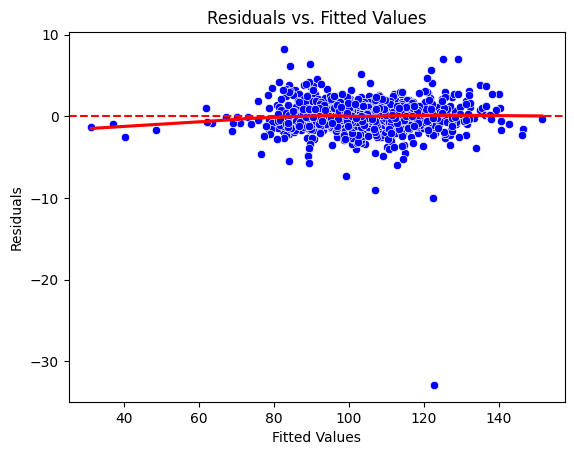

In [ ]:
# Residuals versus fitted values
import seaborn as sns
import matplotlib.pyplot as plt
fitted_values = results.fittedvalues
residuals = results.resid

sns.scatterplot(x=fitted_values, y=residuals, color='blue')
sns.regplot(x=fitted_values, y=residuals, lowess=True, scatter=False, color='red')
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs. Fitted Values')
plt.show()

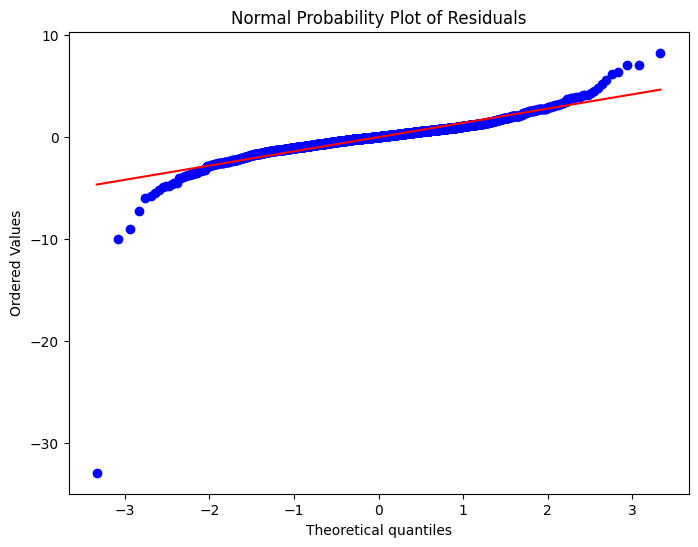

In [ ]:
#Q3
from scipy.stats import probplot
plt.figure(figsize=(8, 6))
probplot(residuals, dist="norm", plot=plt)
plt.title("Normal Probability Plot of Residuals")
plt.show()

The normal probability plot indicates that the residuals are approximately normally distributed in the central region, as most points align with the 45-degree reference line. However, significant deviations at the tails suggest potential outliers or heavy-tailed behavior. This indicates that while the normality assumption holds reasonably well, it may not be perfect, particularly for extreme values.

In [ ]:
#Q4

import pandas as pd
import numpy as np
import statsmodels.api as sm
from itertools import combinations
from sklearn.model_selection import LeaveOneOut
from sklearn.metrics import mean_squared_error

# Stepwise Selection with AIC
def stepwise_selection_aic(X, y):
    """Perform stepwise variable selection using AIC."""
    initial_features = X.columns.tolist()
    best_features = []
    current_score, best_new_score = float('inf'), float('inf')

    while initial_features:
        aic_scores = []
        for feature in initial_features:
            model = sm.OLS(y, sm.add_constant(X[best_features + [feature]])).fit()
            aic_scores.append((model.aic, feature))
        aic_scores.sort(reverse=False)  # Sort by AIC ascending
        best_new_score, best_candidate = aic_scores[0]

        if best_new_score < current_score:
            current_score = best_new_score
            best_features.append(best_candidate)
            initial_features.remove(best_candidate)
        else:
            break  # Exit if no improvement

    # Final model with selected features
    final_model = sm.OLS(y, sm.add_constant(X[best_features])).fit()
    return final_model, best_features

AttributeError: 'numpy.ndarray' object has no attribute 'columns'

In [ ]:
import numpy as np
import pandas as pd
import statsmodels.api as sm

def stepwise_selection_press(X, y, verbose=True):
    """
    Perform stepwise selection based on PRESS statistic to choose predictors for OLS regression.

    Args:
    X : DataFrame (predictors)
    y : Series (response variable)

    Returns:
    model : Final fitted OLS model
    selected_features : List of selected feature names
    """
    # Ensure data is numeric
    X = pd.get_dummies(X, drop_first=True).astype(float)
    y = np.asarray(y).astype(float)

    remaining_features = list(X.columns)
    selected_features = []
    best_press = np.inf

    while remaining_features:
        press_values = {}
        for feature in remaining_features:
            features_to_test = selected_features + [feature]
            X_test = sm.add_constant(X[features_to_test])

            model = sm.OLS(y, X_test).fit()

            # Compute PRESS
            residuals = model.resid
            hat_matrix_diag = model.get_influence().hat_matrix_diag
            press = np.sum((residuals / (1 - hat_matrix_diag))**2)
            press_values[feature] = press

        # Find the feature with the lowest PRESS
        best_feature = min(press_values, key=press_values.get)
        best_press_candidate = press_values[best_feature]

        # Stop if no improvement
        if best_press_candidate < best_press:
            best_press = best_press_candidate
            selected_features.append(best_feature)
            remaining_features.remove(best_feature)
            if verbose:
                print(f"Added {best_feature}, PRESS: {best_press}")
        else:
            break

    # Fit final model
    X_final = sm.add_constant(X[selected_features])
    final_model = sm.OLS(y, X_final).fit()
    return final_model, selected_features


# Example usage
# Assuming X (predictor DataFrame) and y (response Series) are defined
# Convert the response variable
y = designmatrix_withones['trade_price']  # Replace with your response variable column
X = designmatrix.drop('trade_price', axis=1)  # Drop the response column from predictors

# Stepwise selection with PRESS
model_press, selected_features_press = stepwise_selection_press(X, y)
print("Selected Features by PRESS:", selected_features_press)
print(model_press.summary())


Added trade_price_last1, PRESS: 6813.882481510662
Added curve_based_price, PRESS: 5680.785480817918
Added trade_type_3, PRESS: 5264.190231112601
Added trade_price_last7, PRESS: 4938.894396625827
Added trade_type_4, PRESS: 4756.925897540501
Added trade_price_last10, PRESS: 4679.679495203832
Added trade_type_last1_3, PRESS: 4636.006943740738
Added curve_based_price_last5, PRESS: 4593.111770791191
Added trade_price_last4, PRESS: 4540.800905609572
Added trade_size_lt, PRESS: 4504.281032288965
Added trade_type_last4_3, PRESS: 4477.741288886595
Added trade_size_last1_lt, PRESS: 4458.568462622307
Added trade_type_last1_4, PRESS: 4448.512237825935
Added is_callable_1, PRESS: 4442.642497688512
Added trade_type_last4_4, PRESS: 4437.817385671199
Added trade_size_last4_lt, PRESS: 4432.826068167973
Added trade_type_last7_3, PRESS: 4430.567278790348
Added trade_type_last5_3, PRESS: 4429.405251618107
Added reporting_delay, PRESS: 4428.986158958902
Added trade_price_last9, PRESS: 4428.6181741364235
Ad

How does the resulting PRESS model differ from the AIC model?

Below is a comparison of the 2 models-

AIC: 24 features

PRESS: 22 features (dropped curve-based price variables, added time-related variables).


Performance Metrics-

R²: 0.980 (same for both)

AIC: 6206 (AIC model) vs. 6211 (PRESS model, slightly worse).

PRESS: 4426.45 (lower, better for prediction).

Implications-
The AIC model prioritizes model fit (better AIC) while the PRESS model improves predictive accuracy (lower PRESS).